In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
def load_results(path, ranks=[10,100], gamma1=[0.5,1], gamma2=[0.5,1]):
    data = pd.read_csv(path, header=None)
    column_names = ["active", "network", "n_query", "n_passage"]
    for rank in ranks:
        for g1 in gamma1:
            for g2 in gamma2:
                column_names.append("Rank{}_forward_p_{}_reverse_p_{}".format(rank, g1, g2))
    for rank in ranks:
        for g1 in gamma1:
            for g2 in gamma2:
                column_names.append("Baseline_Rank{}_forward_p_{}_reverse_p_{}".format(rank, g1, g2))
    data.columns = column_names
    return data

In [71]:
# Genearte active learning plot
def active_learning(data, selected=[0,10,15,17]):
    data = data[["active", "network", "n_query", "n_passage",
            "Rank10_forward_p_0.5_reverse_p_1", "Rank10_forward_p_1_reverse_p_1",
            "Rank100_forward_p_0.5_reverse_p_1", "Rank100_forward_p_1_reverse_p_1"]]
    data = data.iloc[selected]
    return data
def load_training_loss(path_list):
    all_results = []
    for path in path_list:
        temp = pd.read_csv(path, header=None)
        temp = list(temp.iloc[:,1])
        all_results.append(temp)
    return all_results

In [72]:
def plot_active_learning(loss, data):
    labels = ["No Active Learning", "Active Learning Stage 1", 
              "Active Learning Stage 2", "Active Learning Stage 3"]
    losses = []
    for l in loss:
        losses += l
    evals = list(data["Rank10_forward_p_0.5_reverse_p_1"])
    plt.plot(np.arange(1,len(losses)+1), np.array(losses))
    plt.show()

In [100]:
def main_results_table(data, selected=[0,1,16,17,-1]):
    evals = [data['Baseline_Rank10_forward_p_0.5_reverse_p_1'][0], 
            data['Baseline_Rank10_forward_p_1_reverse_p_1'][0],
            data['Baseline_Rank100_forward_p_0.5_reverse_p_1'][0],
            data['Baseline_Rank100_forward_p_1_reverse_p_1'][0]]
    data = data[["active", "network", "n_query", "n_passage",
            "Rank10_forward_p_0.5_reverse_p_1", "Rank10_forward_p_1_reverse_p_1",
            "Rank100_forward_p_0.5_reverse_p_1", "Rank100_forward_p_1_reverse_p_1"]]
    data = data.append({'active' : 'no_active' , 'network' : 'baseline', 'n_query': 50000, 
                'n_passage': 250000, 'Rank10_forward_p_0.5_reverse_p_1':evals[0],
                'Rank10_forward_p_1_reverse_p_1':evals[1],
                'Rank100_forward_p_0.5_reverse_p_1':evals[2],
                'Rank100_forward_p_1_reverse_p_1':evals[3]} , 
                ignore_index=True)
    data = data.iloc[selected]
    data
    return data

In [101]:
all_results = load_results("/datadrive/ruohan/final_deliverable/all_results.csv")

In [102]:
all_results

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_0.5,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_0.5,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_0.5,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_0.5,Rank100_forward_p_1_reverse_p_1,Baseline_Rank10_forward_p_0.5_reverse_p_0.5,Baseline_Rank10_forward_p_0.5_reverse_p_1,Baseline_Rank10_forward_p_1_reverse_p_0.5,Baseline_Rank10_forward_p_1_reverse_p_1,Baseline_Rank100_forward_p_0.5_reverse_p_0.5,Baseline_Rank100_forward_p_0.5_reverse_p_1,Baseline_Rank100_forward_p_1_reverse_p_0.5,Baseline_Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.632510,0.913484,0.790780,0.831914,0.632526,0.996671,0.790775,0.983808,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
1,no_active,append,50000,200000,0.623855,0.903033,0.780452,0.821561,0.623872,0.996095,0.780447,0.981951,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
2,no_active,residual,250000,200000,0.684819,0.944013,0.843435,0.883884,0.684832,0.999296,0.843431,0.993122,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
3,no_active,append,250000,200000,0.659568,0.925650,0.818314,0.858414,0.659583,0.997517,0.818307,0.987788,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
4,no_active,residual,500000,200000,0.696275,0.950592,0.854308,0.893651,0.696286,0.999669,0.854301,0.994256,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
5,no_active,append,500000,200000,0.661020,0.929533,0.819918,0.861440,0.661034,0.997949,0.819909,0.988613,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
6,stage_1,append,50000,200000,0.611449,0.902855,0.765446,0.816325,0.611465,0.996134,0.765440,0.981399,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
7,stage_1,residual,50000,200000,0.634402,0.916441,0.793214,0.838134,0.634417,0.997120,0.793209,0.985789,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
8,stage_2,append,50000,200000,0.611556,0.899524,0.764912,0.814709,0.611574,0.996165,0.764909,0.981155,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489
9,stage_2,residual,50000,200000,0.622101,0.906728,0.780751,0.825307,0.622119,0.995953,0.780748,0.982589,0.493129,0.753408,0.642068,0.655149,0.49315,0.937152,0.642047,0.887489


In [103]:
main_results_table(all_results)

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.913484,0.831914,0.996671,0.983808
1,no_active,append,50000,200000,0.903033,0.821561,0.996095,0.981951
16,stage_3,append,50000,200000,0.905028,0.823461,0.996167,0.982748
17,stage_3,residual,50000,200000,0.921650,0.846940,0.997645,0.987718
18,no_active,baseline,50000,250000,0.753408,0.655149,0.937152,0.887489


In [56]:
residual_active = active_learning(all_results)

In [57]:
residual_active

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
0,no_active,residual,50000,200000,0.913484,0.831914,0.996671,0.983808
10,stage_1,residual,50000,200000,0.918216,0.843193,0.997818,0.987195
15,stage_2,residual,50000,200000,0.919435,0.843345,0.998180,0.987267
17,stage_3,residual,50000,200000,0.921650,0.846940,0.997645,0.987718


In [58]:
append_active = active_learning(all_results, [1,13,14,16])
append_active

,active,network,n_query,n_passage,Rank10_forward_p_0.5_reverse_p_1,Rank10_forward_p_1_reverse_p_1,Rank100_forward_p_0.5_reverse_p_1,Rank100_forward_p_1_reverse_p_1
1,no_active,append,50000,200000,0.903033,0.821561,0.996095,0.981951
13,stage_1,append,50000,200000,0.902321,0.817979,0.996261,0.982106
14,stage_2,append,50000,200000,0.906286,0.821156,0.996209,0.982212
16,stage_3,append,50000,200000,0.905028,0.823461,0.996167,0.982748


In [41]:
all_training_loss = load_training_loss(["/datadrive/ruohan/final_models/no_active_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_1_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_2_residual_50000_query_200000_passage.csv",
                                       "/datadrive/ruohan/active_learning/stage_3_residual_50000_query_200000_passage.csv"])

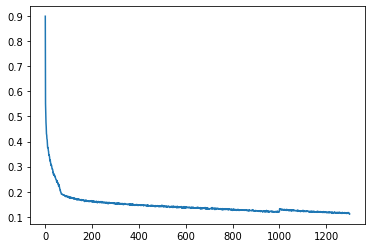

In [54]:
plot_active_learning(all_training_loss, residual_active)